In [122]:
import os
os.chdir('/het/p4/ramirez/gcewavelets/skysearch/code/')

In [123]:
import numpy as np
import sys, os
import _maps as maps

In [124]:
import healpy as hp
import astropy_healpix

In [125]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [126]:
# load local directory
username="ramirez"
local_dir = "/het/p4/"+username+"/gcewavelets/skysearch/"
maps_dir = "/het/p4/"+username+"/gcewavelets/skysearch/data/maps/"

# ---
 # Block: Specify map ids
model = 'ilias_60x60' # only available option: SA0
trial_id = str(0)
model_dir = maps_dir + (model + '_' + trial_id + '/')
energy_bin = '16'
map_type = 'bkgd'

# load events from map 
if energy_bin == 'all' or energy_bin == str(-1):
    if map_type == 'bkgd':
        map_dir = model_dir + 'bkgd/'
    elif map_type == 'all':
        inj_id = str(0)
        map_dir = model_dir + ('bkgd_wps_' + inj_id + '/') 
else:
    ie = int(float(energy_bin))
    if map_type == 'bkgd':
        bkgd_dir = model_dir + 'bkgd/'
        map_dir = bkgd_dir + 'energy_bin_' + str(ie) + '/'
    elif map_type == 'all':
        inj_id = str(0)
        bkgd_wps_dir = model_dir + ('bkgd_wps_' + inj_id + '/')
        map_dir = bkgd_wps_dir + 'energy_bin_' + str(ie) + '/'  

data_dir = map_dir + 'projected_maps/'
# ---

# load father pixel and data
npix = np.random.randint(192)
npix = 112
patch_dir = data_dir + 'map_' + str(npix) + '/'

In [127]:
a_deg = 0.1
str_a_deg = str.format('{0:.5f}',a_deg)

wavelet_name = 'mexh'
grid_scale_deg = 0.1
str_grid_scale_deg = str.format('{0:.4f}',grid_scale_deg)
file_name = wavelet_name + '_' + 'coefficient_map' + '_' + str_a_deg + '_' + str_grid_scale_deg + '.npy'
cwt_map = np.load(patch_dir + file_name, allow_pickle = True)
projected_map = dict(np.load(patch_dir + 'projected_map_dict.npz'))

# decided to separate grid and projected maps into two different dictionaries
# grid is defined using the total background map for all energies
grid_dict = dict(np.load(patch_dir + 'grid_dict_' + str_grid_scale_deg + '_' + '.npz'))
mesh_bxby = grid_dict['rectangular_grid']
grid = grid_dict['grid']

In [128]:
data = projected_map['all_points']
mesh_bxby = grid_dict['rectangular_grid']
grid = grid_dict['grid']

In [129]:
r_out_edge = projected_map['outer_region_edge']
x_out_edge = r_out_edge[:,0] ; y_out_edge = r_out_edge[:,1]
bx_min, bx_max, by_min, by_max = [np.min(x_out_edge), np.max(x_out_edge),
                                  np.min(y_out_edge), np.max(y_out_edge)]

In [130]:
scale = 0.1 * np.pi / 180
step_size = scale 
mesh_bxby, arr_b, arr_bx_plot, arr_by_plot = maps.build_mesh_(bx_min, bx_max, by_min, by_max, step_size, step_size, return_arrays_for_plotting=True)

(-0.22575039922668377,
 0.2262898770398482,
 -0.20317234408792986,
 0.2034893716267495)

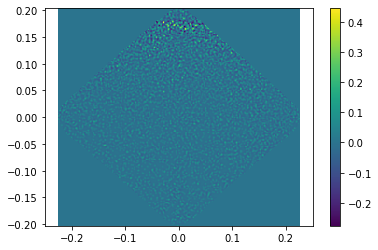

In [131]:
fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_map[:,:,0], cmap='cividis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.min(cwt_map[:,:,0]), 
                                                 vmax=np.max(cwt_map[:,:,0])))
plt.pcolormesh(arr_bx_plot, arr_by_plot, cwt_map[:,:,0])
plt.colorbar()
ax.axis('equal')

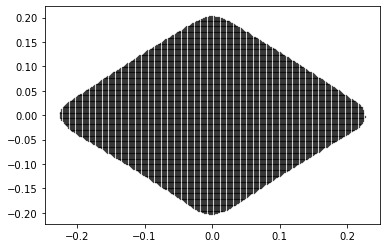

In [132]:
plt.scatter(mesh_bxby[grid][:,0], mesh_bxby[grid][:,1], s=0.1, c='k')

In [133]:
arr_edge_points = projected_map['search_region_edge']
x_edge = arr_edge_points[:,0] ; y_edge = arr_edge_points[:,1]
grid_flat_search = maps.find_points_inside_curve_(arr_b[:,0], arr_b[:,1], x_edge, y_edge, return_grid=True) # 2D array
Ny,Nx = mesh_bxby.shape[:-1]
grid_search = grid_flat_search.reshape((Ny,Nx))

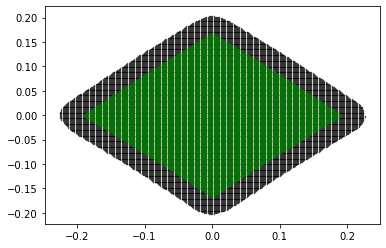

In [134]:
plt.scatter(mesh_bxby[grid][:,0], mesh_bxby[grid][:,1], s=0.1, c='k')
plt.scatter(mesh_bxby[grid_search][:,0], mesh_bxby[grid_search][:,1], s=0.1, c='g')

(array([2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 2.000e+00, 6.000e+00, 9.000e+00, 8.000e+00, 1.000e+01,
        1.500e+01, 2.200e+01, 3.200e+01, 4.500e+01, 7.600e+01, 1.380e+02,
        2.190e+02, 3.740e+02, 5.760e+02, 9.790e+02, 1.596e+03, 2.154e+03,
        2.578e+03, 2.329e+03, 1.764e+03, 1.481e+03, 1.324e+03, 1.186e+03,
        9.720e+02, 7.850e+02, 6.070e+02, 4.710e+02, 3.700e+02, 2.840e+02,
        2.410e+02, 1.920e+02, 1.390e+02, 9.200e+01, 7.300e+01, 5.100e+01,
        4.200e+01, 3.400e+01, 1.600e+01, 1.400e+01, 1.500e+01, 1.300e+01,
        5.000e+00, 3.000e+00, 0.000e+00, 7.000e+00, 3.000e+00, 5.000e+00,
        3.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-0.18797445, -0.18092454, -0.17387462, -0.16682471, -0.15977479,
        -0.15272487, -0.14567496, -0.13862504, -0.13157512, -0.12452521,
        -0.11747529, -0.11042538, -0.10337546, -0.09632554, -0.08927563,
        -0.08222571, -0.07517579, -0.06

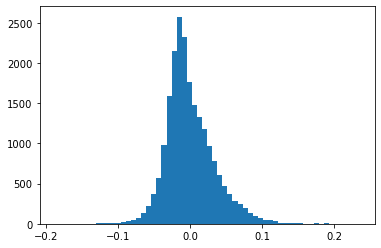

In [135]:
plt.hist(cwt_map[:,:,0][grid_search], bins = 60)

In [136]:
# estimate number of datapoints a set distance away from grid point

def find_points_inside_circle_(x, y, x0, y0, r, return_grid=False, return_number=False):
    """
    x, y: 1D arrays of points
    x0, y0: center of circle
    r: radius of circle
    """
    # find points inside circle
    x = np.array(x) ; y = np.array(y)
    x0 = np.array(x0) ; y0 = np.array(y0)
    r = np.array(r)
    grid = (x-x0)**2 + (y-y0)**2 <= r**2
    if return_grid:
        return grid
    elif return_number:
        return np.sum(grid)
    else:
        return x[grid], y[grid]
    

In [137]:
a = a_deg * np.pi / 180
x_fd, y_fd = find_points_inside_circle_(mesh_bxby[grid][:,0], mesh_bxby[grid][:,1], 0.1, 0, 5*a)

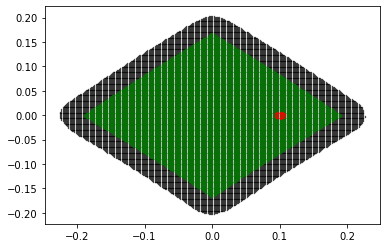

In [138]:
plt.scatter(mesh_bxby[grid][:,0], mesh_bxby[grid][:,1], s=0.1, c='k')
plt.scatter(mesh_bxby[grid_search][:,0], mesh_bxby[grid_search][:,1], s=0.1, c='g')
plt.scatter(x_fd, y_fd, s=0.1, c='r')

In [139]:
# estimate number of datapoints a set distance away from grid point

def find_number_of_points_inside_circle_(x, y, x0, y0, r):
    """
    x, y: 1D arrays of points
    x0, y0: center of circle
    r: radius of circle
    """
    # find points inside circle
    x = np.array(x) ; y = np.array(y)
    x0 = np.array(x0) ; y0 = np.array(y0)
    r = np.array(r)
    grid = (x-x0)**2 + (y-y0)**2 <= r**2
    
    return len(x[grid])
    

In [140]:
counts_map = np.zeros(shape = cwt_map[:,:,0].shape)

for ny in range(Ny):
    for nx in range(Nx):
        bx = mesh_bxby[ny,nx,0] ; by = mesh_bxby[ny,nx,1]

        x_data = data[:,0] ; y_data = data[:,1]
        buf_x_data = x_data[np.newaxis,:] ; buf_y_data = y_data[np.newaxis,:]
        counts_map[ny,nx] = find_number_of_points_inside_circle_(x_data, y_data, bx, by, 5*a)

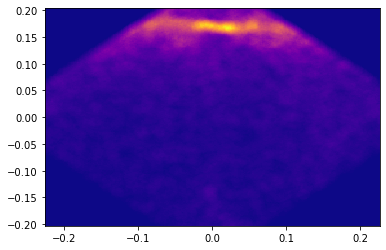

In [141]:
plt.pcolormesh(arr_bx_plot, arr_by_plot, counts_map, cmap='plasma', shading='flat')

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


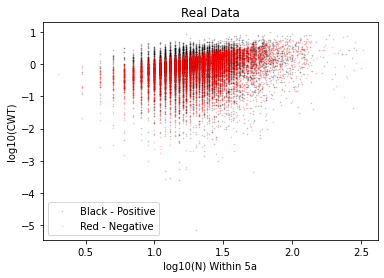

In [142]:
plt.scatter(np.log10(counts_map[grid_search]), np.log10(a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), s = 0.4, c='k', alpha = 0.2)
plt.scatter(np.log10(counts_map[grid_search]), np.log10(-a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), s = 0.4, c='r', alpha = 0.2)
plt.xlabel('log10(N) Within 5a')
plt.ylabel('log10(CWT)')
plt.title('Real Data')
plt.legend(['Black - Positive', 'Red - Negative'])

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


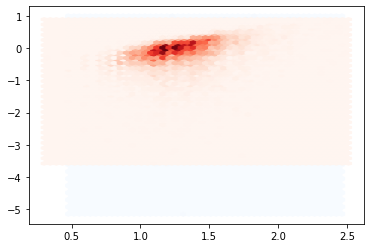

In [143]:
plt.hexbin(np.log10(counts_map[grid_search]), np.log10(a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), gridsize=50, cmap='Blues', mincnt=0)
plt.hexbin(np.log10(counts_map[grid_search]), np.log10(-a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), gridsize=50, cmap='Reds', mincnt=0)

(-0.22575039922668377,
 0.2262898770398482,
 -0.20317234408792986,
 0.2034893716267495)

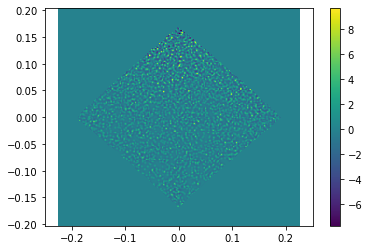

In [144]:
cwt_map[:,:,0][~grid_search] = 0

fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot, arr_by_plot, a * len(x_data) * cwt_map[:,:,0], cmap='cividis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.min(a * len(x_data) * cwt_map[:,:,0]), 
                                                 vmax=np.max(a * len(x_data) * cwt_map[:,:,0])))
plt.pcolormesh(arr_bx_plot, arr_by_plot, a * len(x_data) * cwt_map[:,:,0])
plt.colorbar()
ax.axis('equal')

In [145]:
cwt_max = np.max(a * len(x_data) * cwt_map[:,:,0][grid_search])
nx_max, ny_max = np.where(a * len(x_data) * cwt_map[:,:,0] == cwt_max)

# find distances of grid points from maxima
distances = np.sqrt((mesh_bxby[:,:,0] - mesh_bxby[nx_max,ny_max,0])**2 + (mesh_bxby[:,:,1] - mesh_bxby[nx_max,ny_max,1])**2)
normalized_distances = distances / np.max(distances)

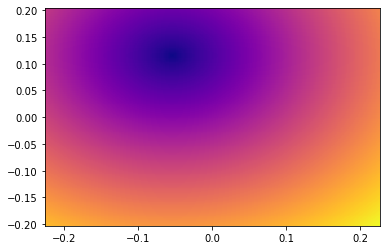

In [146]:
# plot distances as a colormesh
plt.pcolormesh(arr_bx_plot, arr_by_plot, distances, cmap='plasma', shading='flat')

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


Text(0.5, 1.0, 'Real Data')

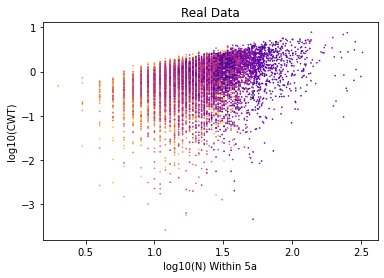

In [147]:
# plt.scatter(np.log10(counts_map[grid_search]), np.log10(a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), s = 0.4, c=normalized_distances[grid_search], cmap = 'plasma', alpha = 1)
plt.scatter(np.log10(counts_map[grid_search]), np.log10(-a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), s = 0.4, c=normalized_distances[grid_search], cmap = 'plasma', alpha = 1)
plt.xlabel('log10(N) Within 5a')
plt.ylabel('log10(CWT)')
plt.title('Real Data')

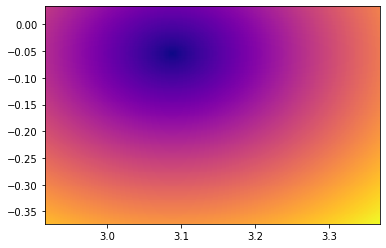

In [148]:
mesh_bxby_recentered = mesh_bxby + projected_map['center_coords']
arr_bx_plot_recentered = arr_bx_plot + projected_map['center_coords'][0]
arr_by_plot_recentered = arr_by_plot + projected_map['center_coords'][1]

# plot distances as a colormesh
plt.pcolormesh(arr_bx_plot_recentered, arr_by_plot_recentered, distances, cmap='plasma', shading='flat')

In [149]:
print(mesh_bxby[0,:])

[[-0.22487773 -0.20229968]
 [-0.22313241 -0.20229968]
 [-0.22138708 -0.20229968]
 [-0.21964175 -0.20229968]
 [-0.21789642 -0.20229968]
 [-0.21615109 -0.20229968]
 [-0.21440576 -0.20229968]
 [-0.21266043 -0.20229968]
 [-0.2109151  -0.20229968]
 [-0.20916977 -0.20229968]
 [-0.20742444 -0.20229968]
 [-0.20567911 -0.20229968]
 [-0.20393378 -0.20229968]
 [-0.20218845 -0.20229968]
 [-0.20044313 -0.20229968]
 [-0.1986978  -0.20229968]
 [-0.19695247 -0.20229968]
 [-0.19520714 -0.20229968]
 [-0.19346181 -0.20229968]
 [-0.19171648 -0.20229968]
 [-0.18997115 -0.20229968]
 [-0.18822582 -0.20229968]
 [-0.18648049 -0.20229968]
 [-0.18473516 -0.20229968]
 [-0.18298983 -0.20229968]
 [-0.1812445  -0.20229968]
 [-0.17949917 -0.20229968]
 [-0.17775384 -0.20229968]
 [-0.17600852 -0.20229968]
 [-0.17426319 -0.20229968]
 [-0.17251786 -0.20229968]
 [-0.17077253 -0.20229968]
 [-0.1690272  -0.20229968]
 [-0.16728187 -0.20229968]
 [-0.16553654 -0.20229968]
 [-0.16379121 -0.20229968]
 [-0.16204588 -0.20229968]
 

In [150]:
l_map = np.zeros(shape = cwt_map[:,:,0].shape)
for ny in range(Ny):
    l_map[ny,:] = np.abs(mesh_bxby_recentered[ny,:,1])

normalized_l_map = l_map / np.max(l_map)

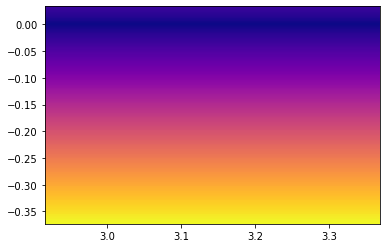

In [151]:
# plot distances as a colormesh
plt.pcolormesh(arr_bx_plot_recentered, arr_by_plot_recentered, l_map, cmap='plasma', shading='flat')

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


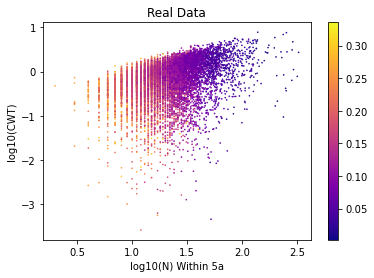

In [152]:
#plt.scatter(np.log10(counts_map[grid_search]), np.log10(a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), s = 0.4, c=l_map[grid_search], cmap = 'plasma', alpha = 1)
plt.scatter(np.log10(counts_map[grid_search]), np.log10(-a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), s = 0.4, c=l_map[grid_search], cmap = 'plasma', alpha = 1)
plt.xlabel('log10(N) Within 5a')
plt.ylabel('log10(CWT)')
plt.title('Real Data')
plt.colorbar()

In [153]:
print(counts_map[grid_search])

[ 20.  23.  15. ... 290. 324. 315.]


In [154]:
import numpy as np
import sys, os
import _maps as maps
import _wavelets as wt

import healpy as hp
import astropy_healpix

import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy.stats import norm, uniform
from scipy.integrate import quad

from tqdm import tqdm

In [155]:
counts_list = counts_map[grid_search]

In [156]:
# load scale parameter
b = np.array([0,0])
b = b[np.newaxis,np.newaxis,:]

buf_cwt_list = []
for N_samples in tqdm(counts_list):
    N_samples = int(N_samples)
    N_uni = 1
    r_data = 0 + np.sqrt(np.random.uniform(low = 0, high = (5*a)**2., size = (N_uni,N_samples)))
    theta_data = np.random.uniform(low = 0., high = 2. * np.pi, size = (N_uni,N_samples))

    x_data = r_data * np.cos(theta_data)
    y_data = r_data * np.sin(theta_data)

    # define 2d wavelet
    wavelet_name = 'mexh'
    mexh = wt._2d_wavelet(wavelet_name)

    # pre-allocate wavelet coefficient map 
    data_sim = np.stack([x_data, y_data], axis = -1)

    buf_arr_arg =  ( (data_sim - b ) / a )

    # calculate wavelet coefficients
    buf_mexh_output = mexh.base_fct(buf_arr_arg)

    # estimate wavelet coefficient by summing over datapoints
    buf_cwt = np.sum(buf_mexh_output, axis = -1) 
    buf_cwt_list.append(buf_cwt)

100%|██████████| 21367/21367 [00:01<00:00, 14587.36it/s]


/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in log10
  """


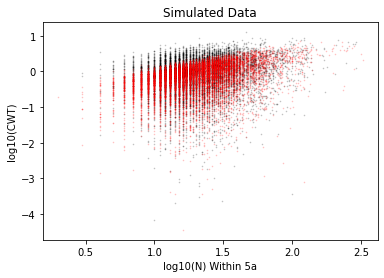

In [157]:
buf_cwt_list = np.array(buf_cwt_list)

if N_uni == 1:
    plt.scatter(np.log10(counts_list), np.log10(buf_cwt_list), s = 0.4, c='k', alpha = 0.2)
    plt.scatter(np.log10(counts_list), np.log10(-buf_cwt_list), s = 0.4, c='r', alpha = 0.2)
    plt.xlabel('log10(N) Within 5a')
    plt.ylabel('log10(CWT)')
    plt.title('Simulated Data')

if N_uni > 1:
    for n in range(N_uni):
        plt.scatter(np.log10(counts_list), np.log10(buf_cwt_list[:,n]), s = 0.4, c='k', alpha = 0.2)
        plt.scatter(np.log10(counts_list), np.log10(-buf_cwt_list[:,n]), s = 0.4, c='r', alpha = 0.2)
    plt.xlabel('log10(N) Within 5a')
    plt.ylabel('log10(CWT)')
    plt.title('Simulated Data')

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


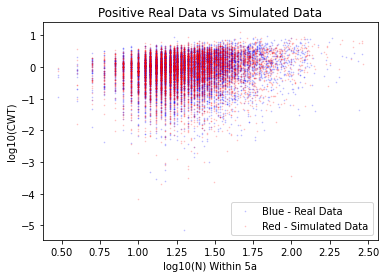

In [158]:
# compare positive real data and simulated data

plt.scatter(np.log10(counts_map[grid_search]), np.log10(a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), s = 0.5, c='b', alpha = 0.2)

if N_uni == 1:
    plt.scatter(np.log10(counts_list), np.log10(buf_cwt_list), s = 0.4, c='red', alpha = 0.2)

if N_uni > 1:
    for n in range(N_uni):
        plt.scatter(np.log10(counts_list), np.log10(buf_cwt_list[:,n]), s = 0.4, c='red', alpha = 0.2)

plt.xlabel('log10(N) Within 5a')
plt.ylabel('log10(CWT)')
plt.title('Positive Real Data vs Simulated Data')
plt.legend(['Blue - Real Data', 'Red - Simulated Data'])


/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


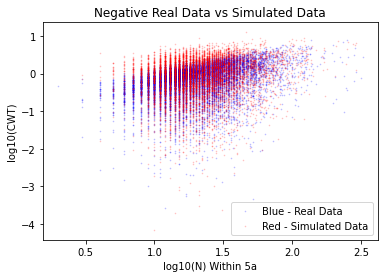

In [159]:
# compare negative real data and simulated data

plt.scatter(np.log10(counts_map[grid_search]), np.log10(-a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), s = 0.5, c='b', alpha = 0.2)

if N_uni == 1:
    plt.scatter(np.log10(counts_list), np.log10(buf_cwt_list), s = 0.4, c='red', alpha = 0.2)

if N_uni > 1:
    for n in range(N_uni):
        plt.scatter(np.log10(counts_list), np.log10(buf_cwt_list[:,n]), s = 0.4, c='red', alpha = 0.2)
        
plt.xlabel('log10(N) Within 5a')
plt.ylabel('log10(CWT)')
plt.title('Negative Real Data vs Simulated Data')
plt.legend(['Blue - Real Data', 'Red - Simulated Data'])


In [160]:
buf_cwt_list_sq = np.squeeze(buf_cwt_list, axis = -1)
buf_cwt_list_sq.shape

(21367,)

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in log10
  


Text(0.5, 1.0, 'Positive Real Data vs Simulated Data')

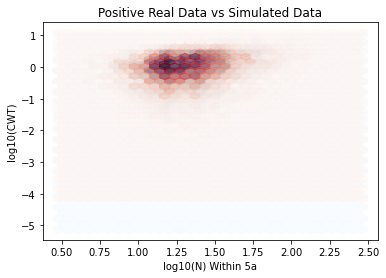

In [161]:
# compare positive real data and simulated data

plt.hexbin(np.log10(counts_map[grid_search]), np.log10(a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), gridsize=30, cmap='Blues', alpha = 0.8)

if N_uni == 1:
    plt.hexbin(np.log10(counts_list), np.log10(buf_cwt_list_sq), gridsize=30, cmap='Reds', alpha = 0.5)

if N_uni > 1:
    for n in range(N_uni):
        plt.hexbin(np.log10(counts_list), np.log10(buf_cwt_list[:,n]), gridsize=30, cmap='Reds', alpha = 0.5)

plt.xlabel('log10(N) Within 5a')
plt.ylabel('log10(CWT)')
plt.title('Positive Real Data vs Simulated Data')


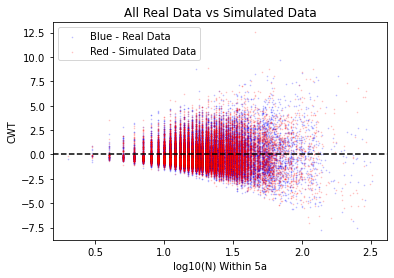

In [162]:
# compare negative real data and simulated data

plt.scatter(np.log10(counts_map[grid_search]), a * len(data[:,0]) * cwt_map[:,:,0][grid_search], s = 0.5, c='b', alpha = 0.2)

if N_uni == 1:
    plt.scatter(np.log10(counts_list), buf_cwt_list, s = 0.4, c='red', alpha = 0.2)

if N_uni > 1:
    for n in range(N_uni):
        plt.scatter(np.log10(counts_list), buf_cwt_list[:,n], s = 0.4, c='red', alpha = 0.2)
        
plt.xlabel('log10(N) Within 5a')
plt.ylabel('CWT')
plt.title('All Real Data vs Simulated Data')
plt.legend(['Blue - Real Data', 'Red - Simulated Data'])
plt.axhline(y = 0, ls = '--', c = 'k')


(-7.739015749467542, 9.67592910948226)

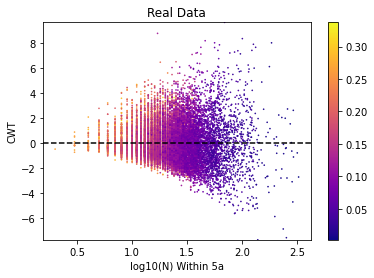

In [163]:
# compare negative real data and simulated data

plt.scatter(np.log10(counts_map[grid_search]), a * len(data[:,0]) * cwt_map[:,:,0][grid_search], s = 0.4, c=l_map[grid_search], cmap = 'plasma', alpha = 1)
        
plt.xlabel('log10(N) Within 5a')
plt.ylabel('CWT')
plt.title('Real Data')
plt.axhline(y = 0, ls = '--', c = 'k')
plt.colorbar()
plt.ylim([np.min(a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), np.max(a * len(data[:,0]) * cwt_map[:,:,0][grid_search])])

(-7.739015749467542, 9.67592910948226)

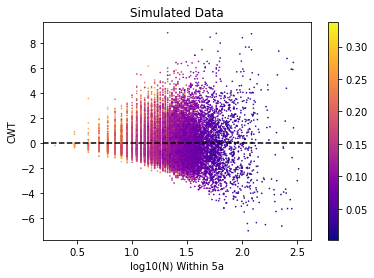

In [164]:
if N_uni == 1:
    plt.scatter(np.log10(counts_list), buf_cwt_list, s = 0.4, c=l_map[grid_search], cmap = 'plasma', alpha = 1)

if N_uni > 1:
    for n in range(N_uni):
        plt.scatter(np.log10(counts_list), buf_cwt_list[:,n], s = 0.4, c=l_map[grid_search], cmap = 'plasma', alpha = 1)

plt.xlabel('log10(N) Within 5a')
plt.ylabel('CWT')
plt.title('Simulated Data')
plt.axhline(y = 0, ls = '--', c = 'k')
plt.colorbar()
plt.ylim([np.min(a * len(data[:,0]) * cwt_map[:,:,0][grid_search]), np.max(a * len(data[:,0]) * cwt_map[:,:,0][grid_search])])

In [165]:
grid_l = ( l_map[grid_search] > 0.3 )
grid_cwt = (a * len(data[:,0]) * cwt_map[:,:,0][grid_search] > 10)

cwt_thresh = a * len(data[:,0]) * cwt_map[:,:,0][grid_search][grid_l & grid_cwt]

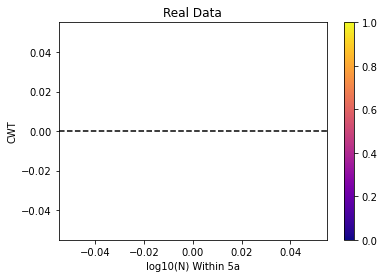

In [166]:
# compare negative real data and simulated data

plt.scatter(np.log10(counts_map[grid_search][grid_l & grid_cwt]), a * len(data[:,0]) * cwt_map[:,:,0][grid_search][grid_l & grid_cwt], s = 0.4, c=l_map[grid_search][grid_l & grid_cwt], cmap = 'plasma', alpha = 1)
        
plt.xlabel('log10(N) Within 5a')
plt.ylabel('CWT')
plt.title('Real Data')
plt.axhline(y = 0, ls = '--', c = 'k')
plt.colorbar()

Text(0.5, 1.0, 'CWT Map')

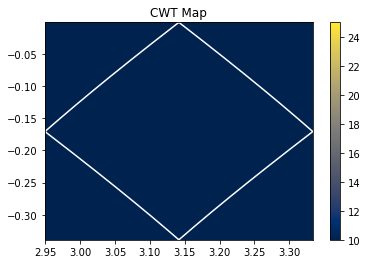

In [167]:
cwt_map[:,:,0][~grid_search] = 0

fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot_recentered, arr_by_plot_recentered, a * len(data[:,0]) * cwt_map[:,:,0], cmap='cividis', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=10, 
                                                 vmax=25))
x_edge_recentered = x_edge + projected_map['center_coords'][0] ; y_edge_recentered = y_edge + projected_map['center_coords'][1]
plt.plot(x_edge_recentered ,y_edge_recentered, c = 'w')
plt.colorbar(plot, ax=ax)
plt.xlim([np.min(x_edge_recentered), np.max(x_edge_recentered)])
plt.ylim([np.min(y_edge_recentered), np.max(y_edge_recentered)])
plt.title('CWT Map')

Text(0.5, 1.0, 'Counts Map')

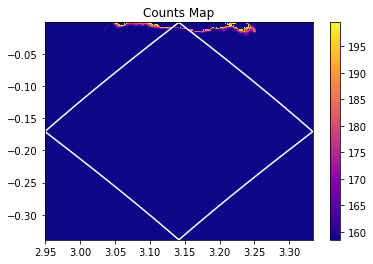

In [168]:
counts_min = 10**2.2
counts_max = 10**2.3

counts_map_thresh = np.zeros(counts_map.shape)
thresh_c = (counts_map > counts_min) & (counts_map < counts_max)
counts_map_thresh[thresh_c] = counts_map[thresh_c]

fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot_recentered, arr_by_plot_recentered, counts_map_thresh, cmap='plasma', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=counts_min, 
                                                 vmax=counts_max))
plt.plot(x_edge_recentered ,y_edge_recentered, c = 'w')
plt.colorbar(plot, ax=ax)
plt.xlim([np.min(x_edge_recentered), np.max(x_edge_recentered)])
plt.ylim([np.min(y_edge_recentered), np.max(y_edge_recentered)])
plt.title('Counts Map')

/het/p4/ramirez/envs/gcw2/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Log Counts Map')

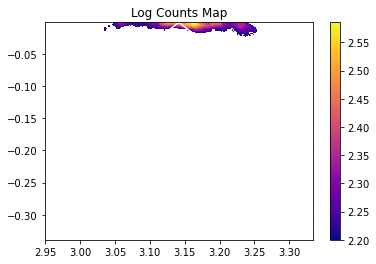

In [169]:
counts_min = 10**2.2
counts_max = np.max(counts_map)

counts_map_thresh = np.zeros(counts_map.shape)
thresh_c = (counts_map > counts_min) & (counts_map < counts_max)
counts_map_thresh[thresh_c] = counts_map[thresh_c]

fig = plt.figure(1,figsize=(6,4))
ax = fig.add_subplot(111)

plot = plt.pcolormesh(arr_bx_plot_recentered, arr_by_plot_recentered, np.log10(counts_map_thresh), cmap='plasma', shading='flat'
                     , norm=mpl.colors.Normalize(vmin=np.log10(counts_min), 
                                                 vmax=np.log10(counts_max)))
plt.plot(x_edge_recentered ,y_edge_recentered, c = 'w')
plt.colorbar(plot, ax=ax)
plt.xlim([np.min(x_edge_recentered), np.max(x_edge_recentered)])
plt.ylim([np.min(y_edge_recentered), np.max(y_edge_recentered)])
plt.title('Log Counts Map')